In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read CSV of Olympic History
athlete = pd.read_csv('athlete_events.csv')

In [3]:
#Filter winter olympics
winter=athlete[athlete['Season'] == 'Winter']

In [4]:
#Fix an issue with 1936 olympic
olympic_1936=winter[winter['Year']==1936]
olp_ger_1936=olympic_1936[olympic_1936['Team']=='Germany']
olp_ger_1936[olp_ger_1936['Medal']=='Gold']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
45903,23690,"Christel Franziska Antonia ""Christl"" Cranz (-B...",F,21.0,NaN,NaN,Germany,GER,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Alpine Skiing,Alpine Skiing Women's Combined,Gold
187822,94372,Franz Pfnr,M,27.0,NaN,NaN,Germany,GER,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Alpine Skiing,Alpine Skiing Men's Combined,Gold


In [6]:
#Create a list with all the hosting cities
hosts=(
    winter
    .groupby('Year')['City']
    .unique()
)
hosts=list(hosts)
cities_hosting = []
for host in hosts:
    cities_hosting.append(host[0])

In [7]:
#Create 3 different datasets to create de Olympic Table
winter_gold_winners=winter[winter['Medal']=='Gold']
winter_silver_winners=winter[winter['Medal']=='Silver']
winter_bronze_winners=winter[winter['Medal']=='Bronze']

In [8]:
#Bronze medals
bronze = (
    winter_bronze_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

)

bronze=bronze.rename(columns = {'Event':'Bronze'})

medals_guia = bronze.drop('Bronze',axis=1)

In [9]:
#Silver medals
silver=(
    winter_silver_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

silver=silver.rename(columns = {'Event':'Silver'})

keys = list(medals_guia.columns.values)
i1 = silver.set_index(keys).index
i2 = medals_guia.set_index(keys).index
silver_guia=silver[i1.isin(i2)]
silver_guia=silver_guia.reset_index(drop=True)
# medals_silver_guia

In [10]:
#Gold Medals
gold = (
    winter_gold_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)
    # .sort_values(by='Gold')
    # .head(200)
    # .reset_index(drop=True)
    # .groupby('Year')
)

gold=gold.rename(columns = {'Event':'Gold'})

keys = list(medals_guia.columns.values)
i1 = gold.set_index(keys).index
i2 = medals_guia.set_index(keys).index
gold_guia=gold[i1.isin(i2)]
gold_guia=gold_guia.reset_index(drop=True)

In [11]:
#Medal table through all the olympic winter games
medallero=(
    bronze
    .merge(silver_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .merge(gold_guia,on=['Year','NOC'],how='outer')
    .fillna(0)
    .sort_values(by=['Year','Gold','Silver','Bronze'],ascending=False)
)

In [12]:
#Rename de columns and reset index
cols = ['Year','NOC','Gold','Silver','Bronze']
medallero=medallero[cols]
medallero=medallero.reset_index(drop=True)

In [13]:
#Fix integer type to new columns
medallero['Silver']=medallero['Silver'].astype(int)
medallero['Gold']=medallero['Gold'].astype(int)

In [14]:
#Years of the winter olympics
years=(
    medallero['Year']
    .unique()
)

In [15]:
#Create our final dataframe with information of all the olympics through time, and ranking it
arr_df_aux=[]
for year in years:
    df_aux= medallero[medallero['Year']==year].copy()
    valor=np.arange(1,len(df_aux)+1)
    df_aux['Ranking']=valor
    arr_df_aux.append(df_aux)


medallero_invierno_ranking=pd.concat(arr_df_aux)

In [16]:
winter[winter['Team']=='Germany']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
995,561,Thomas Abratis,M,26.0,184.0,73.0,Germany,GER,1994 Winter,1994,Winter,Lillehammer,Nordic Combined,Nordic Combined Men's Team,NaN
996,561,Thomas Abratis,M,26.0,184.0,73.0,Germany,GER,1994 Winter,1994,Winter,Lillehammer,Nordic Combined,Nordic Combined Men's Individual,NaN
1050,586,Tobias Abstreiter,M,31.0,178.0,85.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
1242,702,Ronny Ackermann,M,20.0,184.0,69.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Nordic Combined,Nordic Combined Men's Team,NaN
1243,702,Ronny Ackermann,M,20.0,184.0,69.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Nordic Combined,Nordic Combined Men's Individual,NaN
1244,702,Ronny Ackermann,M,24.0,184.0,69.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Nordic Combined,Nordic Combined Men's Team,Silver
1245,702,Ronny Ackermann,M,24.0,184.0,69.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Nordic Combined,Nordic Combined Men's Individual,NaN
1246,702,Ronny Ackermann,M,24.0,184.0,69.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Nordic Combined,Nordic Combined Men's Sprint,Silver
1247,702,Ronny Ackermann,M,28.0,184.0,69.0,Germany,GER,2006 Winter,2006,Winter,Torino,Nordic Combined,Nordic Combined Men's Team,Silver
1248,702,Ronny Ackermann,M,28.0,184.0,69.0,Germany,GER,2006 Winter,2006,Winter,Torino,Nordic Combined,Nordic Combined Men's Individual,NaN


In [17]:
#Query with all the cities that had held the winter olympics
winter.City.unique()

array(['Calgary', 'Albertville', 'Lillehammer', 'Salt Lake City',
       'Lake Placid', 'Sochi', 'Nagano', 'Torino', 'Squaw Valley',
       'Innsbruck', 'Sarajevo', 'Oslo', "Cortina d'Ampezzo", 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [18]:
#List of all the countries that had held an olympic winter game
Paises_organizadores = ['Canada','France','Norway','USA','USSR','Russia',
                        'Italy','Austria','Bosnia-Herzegovina','Japan','Switzerland','Germany']

In [19]:
#Parse of the list of host countries
NOC_organizadores =['CAN','FRA','NOR','URS','RUS','ITA','AUT','YUG','JPN','SUI','GER']

In [20]:
#Top3 finalists per olympic game
top3_historic=(
    medallero_invierno_ranking
    .groupby('Year')
    .head(3)
)
 
years_lst=list(years)
years_aux= []
for x in reversed(years_lst):
    years_aux.append(x)
years_lst=years_aux

In [21]:
#All countries that had win the winter olympics at least one time
ganadores=(
    medallero_invierno_ranking
    .groupby('Year')
    .head(1)
)

In [22]:
#Create one single dataframe of all-time winter olympics countries
winners=pd.DataFrame(ganadores.groupby('NOC').count().sort_values(by=('Year'),ascending=False).loc[:,'Year']).reset_index()

## Ploting 

In [23]:
#Define the labels of the historic finish positions and create arrays for plotting
winners_labels=(
    winners['NOC'].unique()
)
rankings=[]


for pais in winners_labels:
    df_aux=top3_historic[top3_historic['NOC']==pais].loc[:,['Year','Ranking']]

    years_aux=list(df_aux['Year'])
    lista_aux=[]
    for year in years_lst:
        if(year in years_aux):
            valor=df_aux.loc[df_aux['Year'] == year]['Ranking'].iloc[0]
            lista_aux.append(valor)
        else:
            lista_aux.append(4)
    rankings.append(lista_aux)


In [24]:
#Fix issue with the USSR/RUS and Germany
USR=rankings[0]
USR[16:]=rankings[3][16:]
USR[15]=2
NOR=rankings[1]
GER=rankings[2]
GER[10:15]=rankings[5][10:15]
GER[3]=2

CAN=rankings[4]
USA=rankings[6]

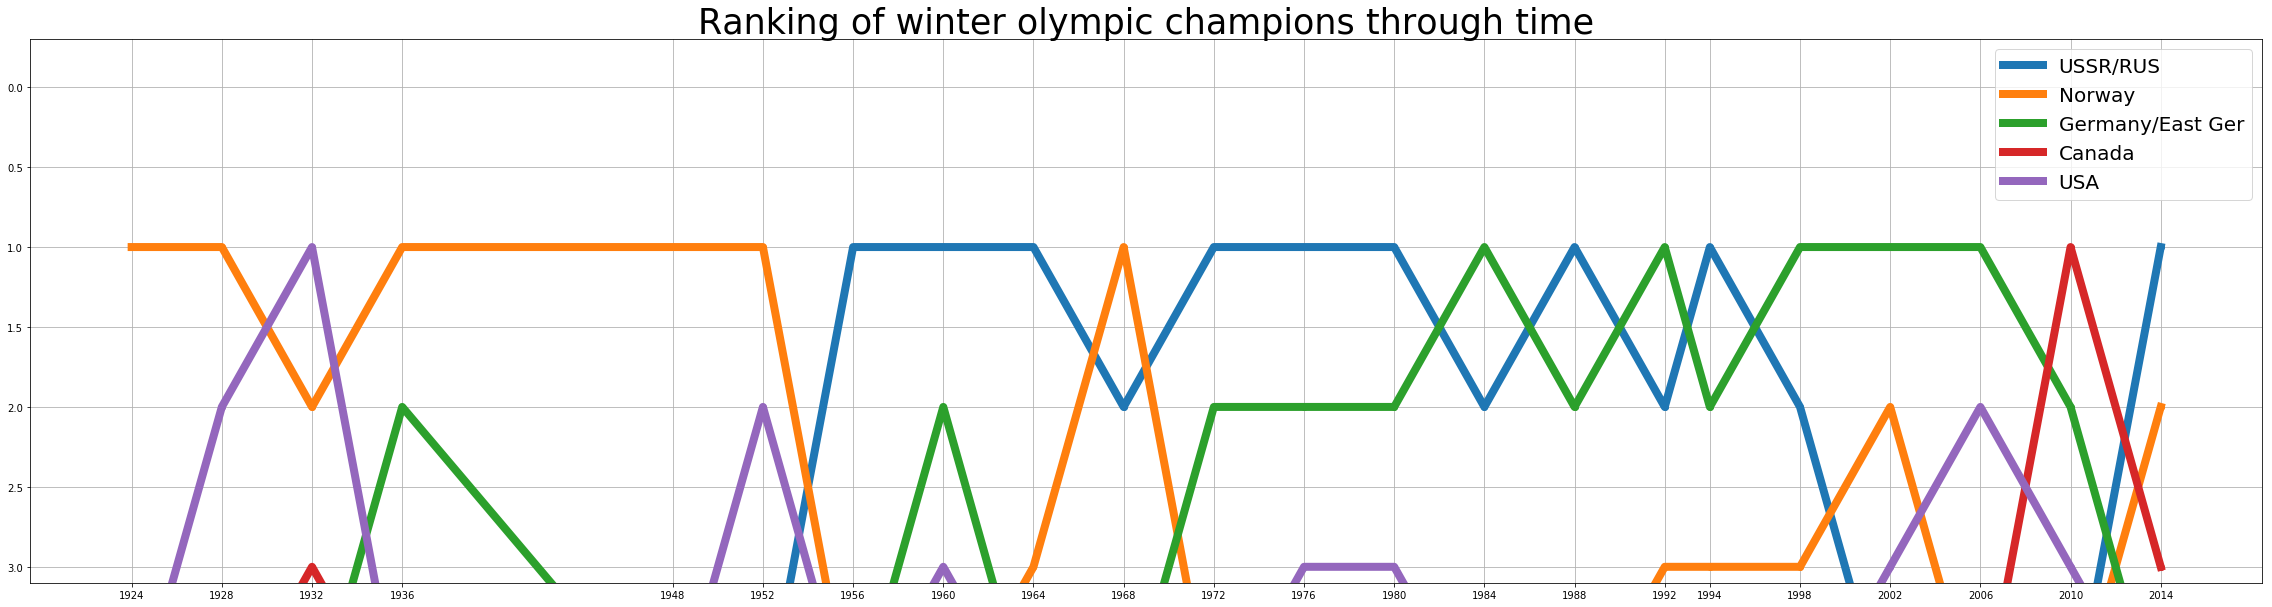

In [25]:
#Plot of the top 3 finish positions of 5 olympic winter winners
plt.figure(figsize=(40,10))

for rank in [USR,NOR,GER,CAN,USA]:
    plt.plot(years,list(reversed(rank)),'-o',linewidth=8.0)

plt.legend(['USSR/RUS','Norway','Germany/East Ger','Canada','USA'], loc='upper right',fontsize= 20)
plt.ylim((-0.3,3.1))
plt.xticks(years)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Ranking of winter olympic champions through time',fontsize= 35)
plt.show()

In [26]:
#Create final winner table
tabla_ganadores=winners
tabla_ganadores.iloc[0,0]='URS/RUS'
tabla_ganadores.iloc[2,0]='GER/GDR'
tabla_ganadores.iloc[0,1]=9
tabla_ganadores.iloc[2,1]=5
tabla_ganadores.drop(3,inplace=True)
tabla_ganadores.drop(5,inplace=True)
tabla_ganadores.reset_index(drop=True)
tabla_ganadores

,NOC,Year
0,URS/RUS,9
1,NOR,6
2,GER/GDR,5
4,CAN,1
6,USA,1


In [27]:
tabla_ganadores['Team']=['USSR/RUS','Norway','Germany/East Germany','Canada','USA']

In [28]:
tabla_ganadores.columns=['NOC','Wins','Team']

In [29]:
tabla_ganadores = tabla_ganadores[['NOC','Team','Wins']]

## Hosts

In [30]:
# Id of all the countries that had at least host once the olympic winter games
NOC_organizadores =['CAN','FRA','NOR','URS','RUS','ITA','AUT','YUG','JPN','SUI','GER','GDR','USA']

In [31]:
#List with all the historic positions of all the countries hosts
rankings_hist=[]

for pais in NOC_organizadores:
    df_aux=medallero_invierno_ranking[medallero_invierno_ranking['NOC']==pais].loc[:,['Year','Ranking']]

    years_aux=list(df_aux['Year'])
    lista_aux=[]
    for year in years_lst:
        if(year in years_aux):
            valor=df_aux.loc[df_aux['Year'] == year]['Ranking'].iloc[0]
            lista_aux.append(valor)
        else:
            lista_aux.append(0)
    aux=(pais,lista_aux)
    rankings_hist.append(aux)

In [32]:
pd_aux=pd.DataFrame(rankings_hist)
pd_aux.columns=['Country','Positions']
pd_aux
ranking_hosts=pd.DataFrame(pd_aux.Positions.values.tolist(),index=pd_aux.iloc[:,0],columns=list(reversed(years)))

In [33]:
##GRAPHS OF SOME COUNTRIES, and fixing the issues with USSR/RUS and Germany

In [34]:
GER_GDR = ranking_hosts.loc['GER',:]+ranking_hosts.loc['GDR',:]
USSR_RUS = ranking_hosts.loc['URS',:]+ranking_hosts.loc['RUS',:]
GER_GDR[1936]=2
GER_GDR_graph=GER_GDR.drop([1924,1948])
USSR_RUS[1992]=2
USSR_RUS_graph = USSR_RUS.drop([1924,1928,1932,1936,1948,1952])

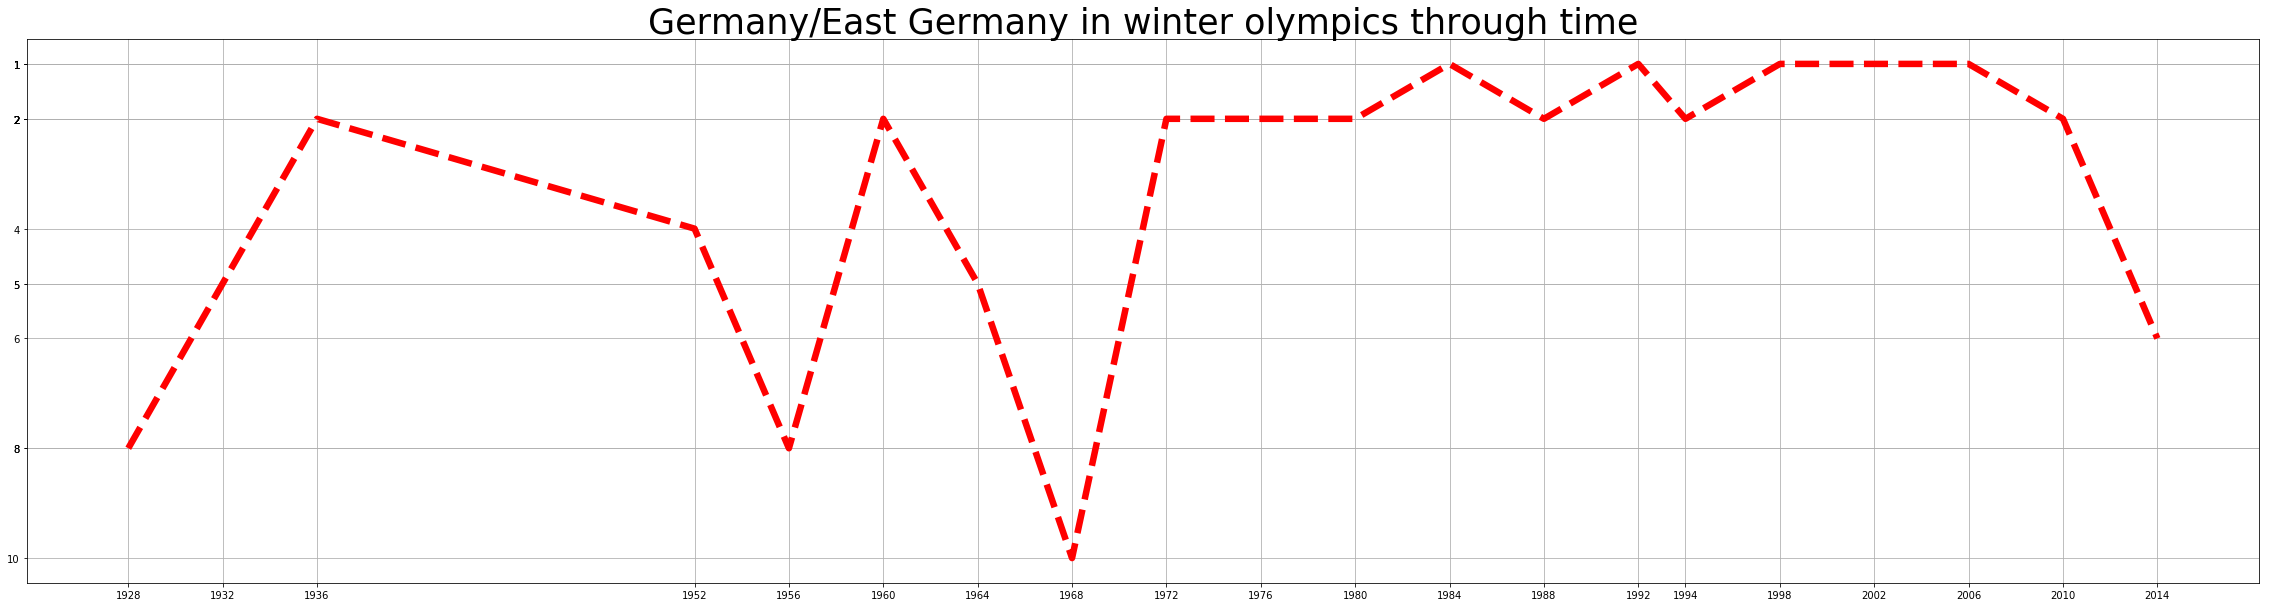

In [35]:
plt.figure(figsize=(40,10))

plt.plot(GER_GDR_graph.index,GER_GDR_graph.values,'--',color='red',linewidth=6.5)
plt.xticks(GER_GDR_graph.index)
plt.yticks(GER_GDR_graph.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Germany/East Germany in winter olympics through time',fontsize= 35)
plt.show()

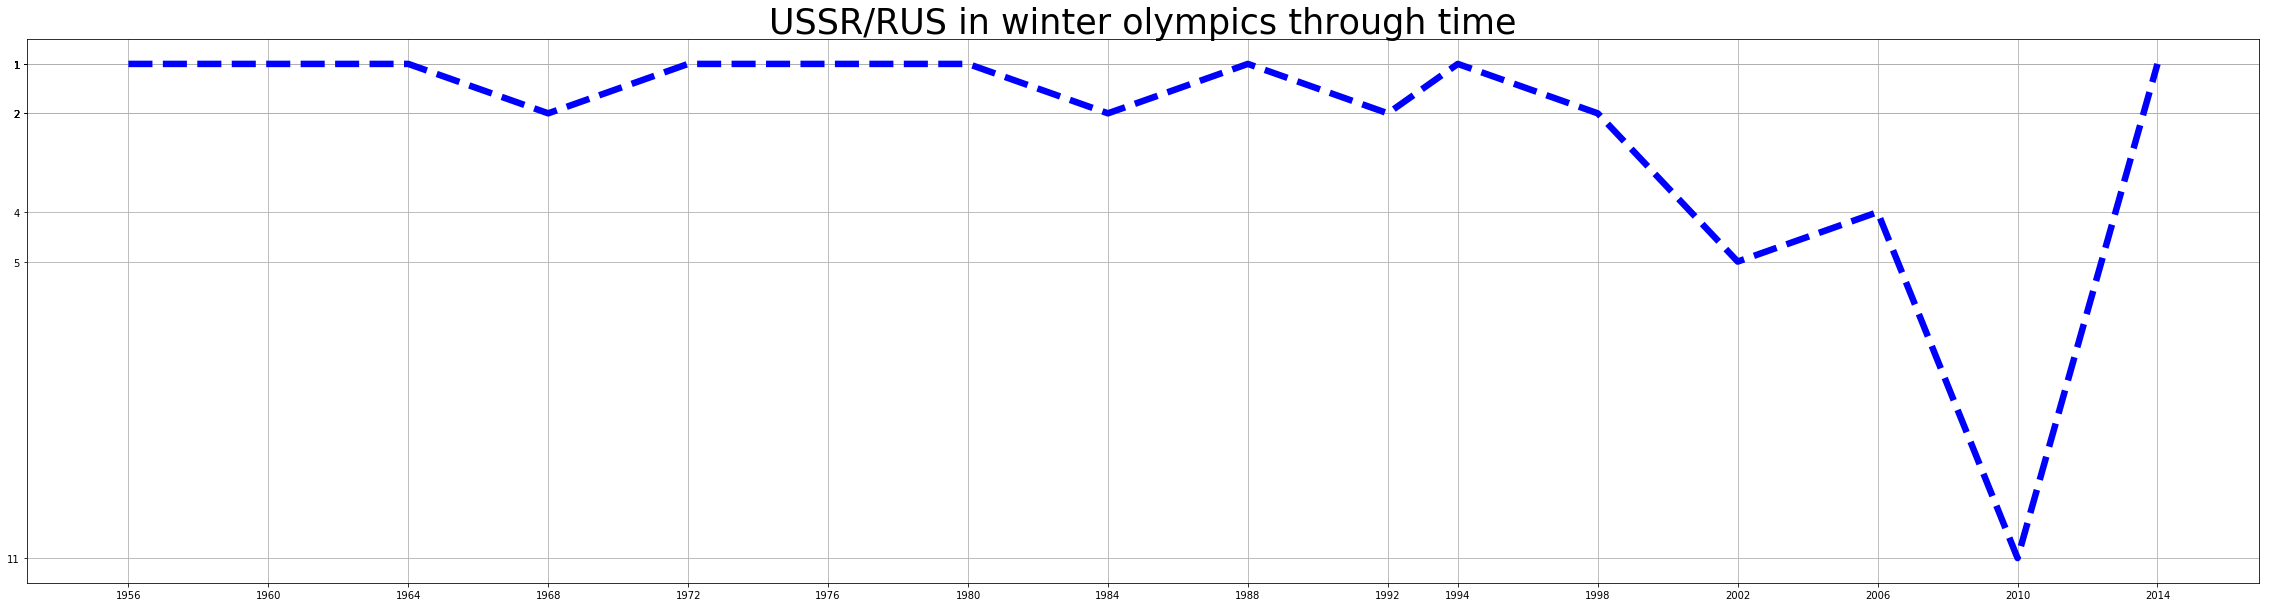

In [36]:
plt.figure(figsize=(40,10))

plt.plot(USSR_RUS_graph.index,USSR_RUS_graph.values,'--',color='blue',linewidth=6.5)
plt.xticks(USSR_RUS_graph.index)
plt.yticks(USSR_RUS_graph.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('USSR/RUS in winter olympics through time',fontsize= 35)
plt.show()

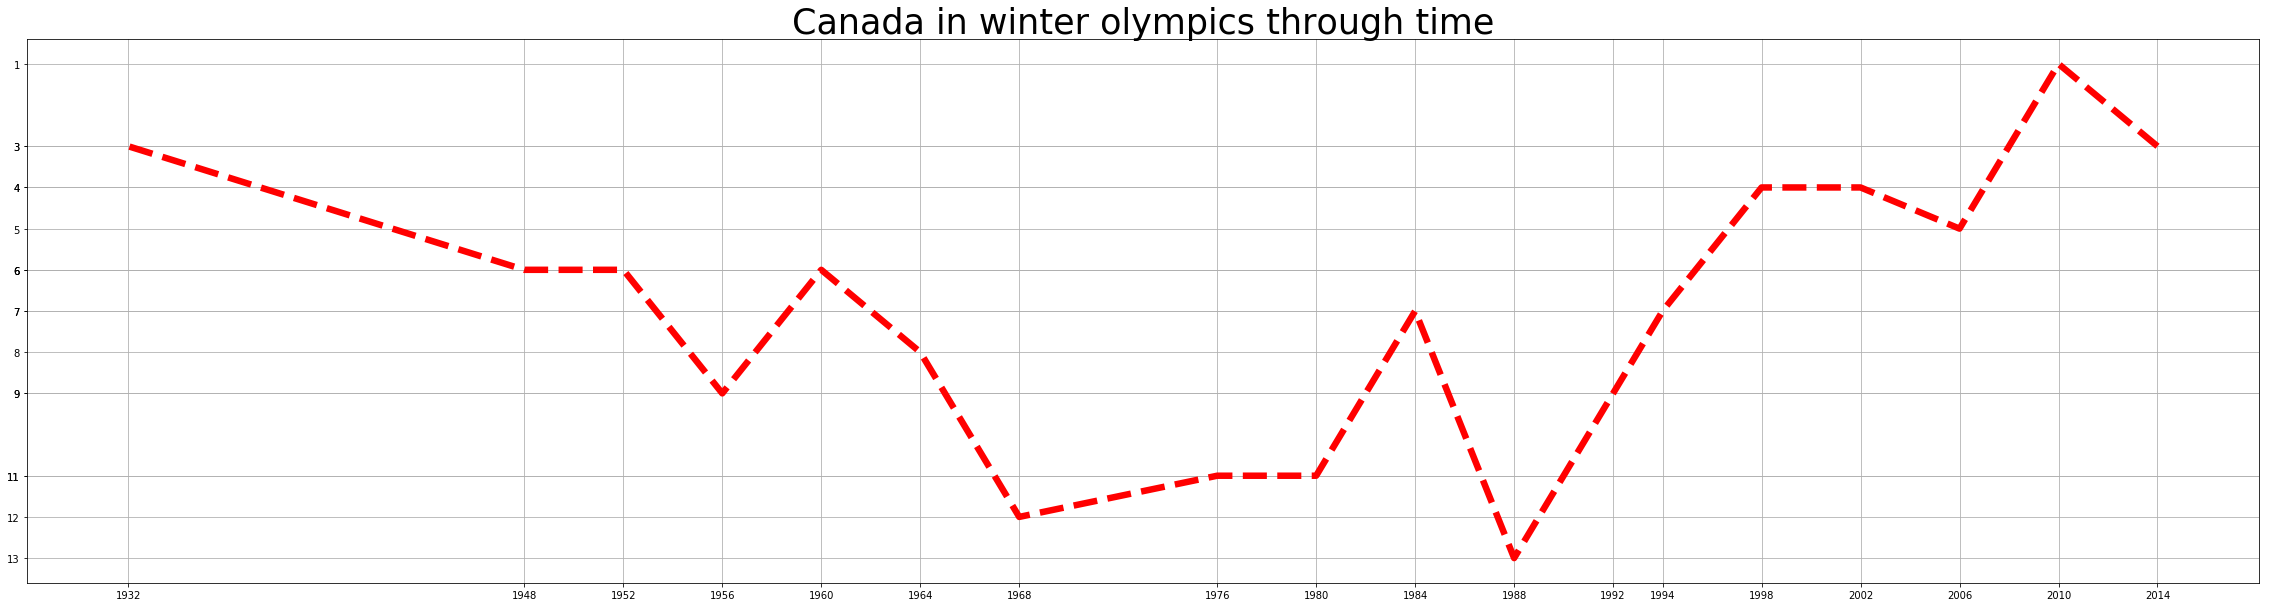

In [37]:
Hist_Canada=(
    medallero_invierno_ranking[medallero_invierno_ranking['NOC']=='CAN']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_Canada.index,Hist_Canada.values,'--',color='red',linewidth=6.5)
plt.xticks(Hist_Canada.index)
plt.yticks(Hist_Canada.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Canada in winter olympics through time',fontsize= 35)
plt.show()

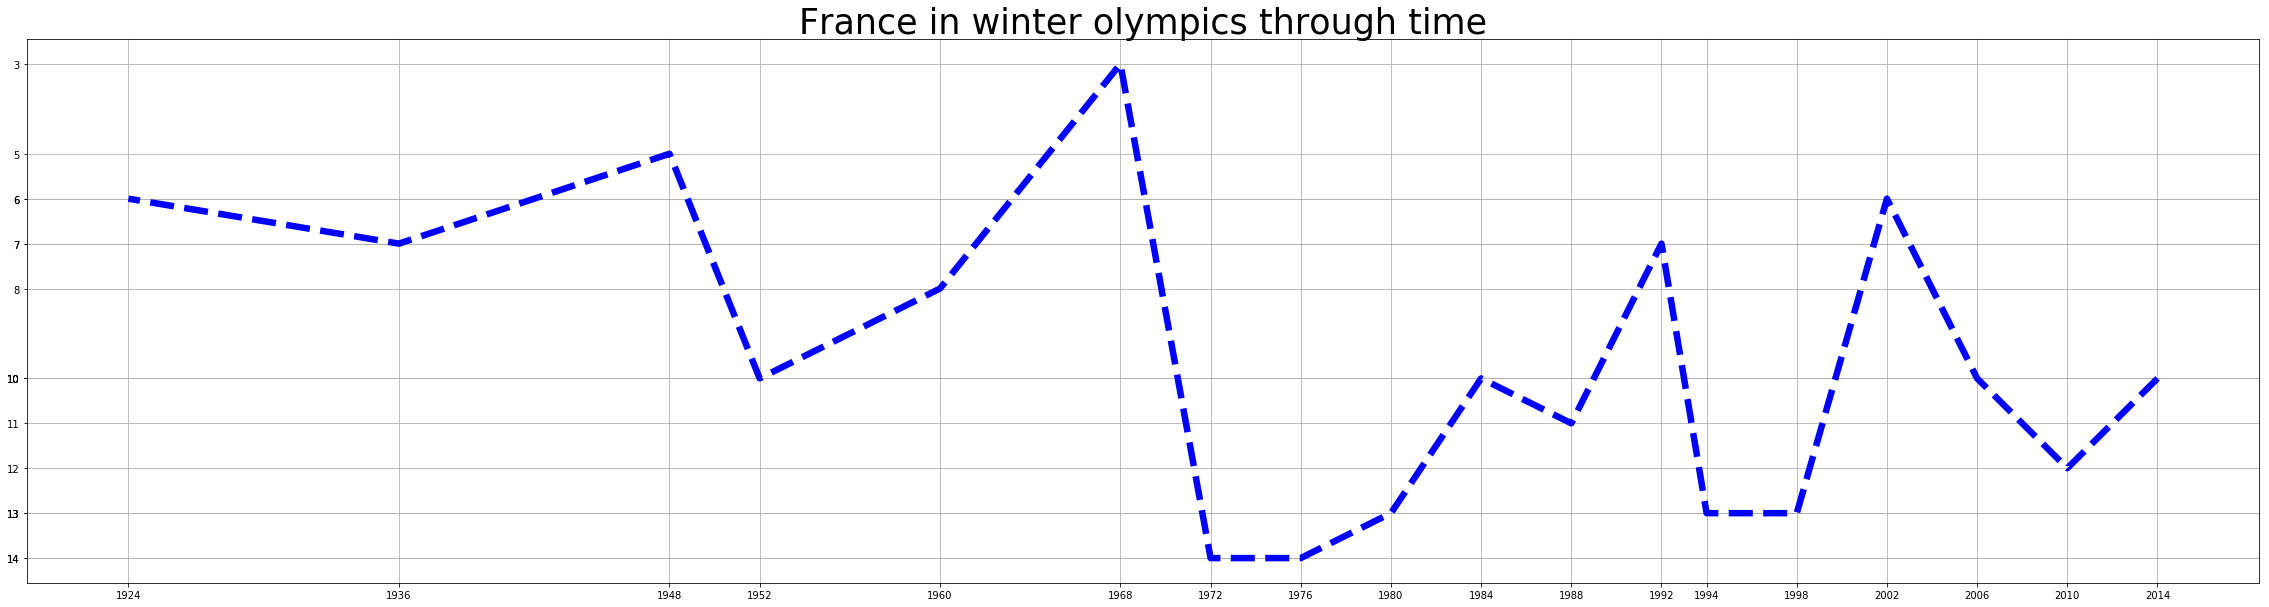

In [38]:
Hist_France=(
    medallero_invierno_ranking[medallero_invierno_ranking['NOC']=='FRA']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_France.index,Hist_France.values,'--',color='blue',linewidth=6.5)
plt.xticks(Hist_France.index)
plt.yticks(Hist_France.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('France in winter olympics through time',fontsize= 35)
plt.show()

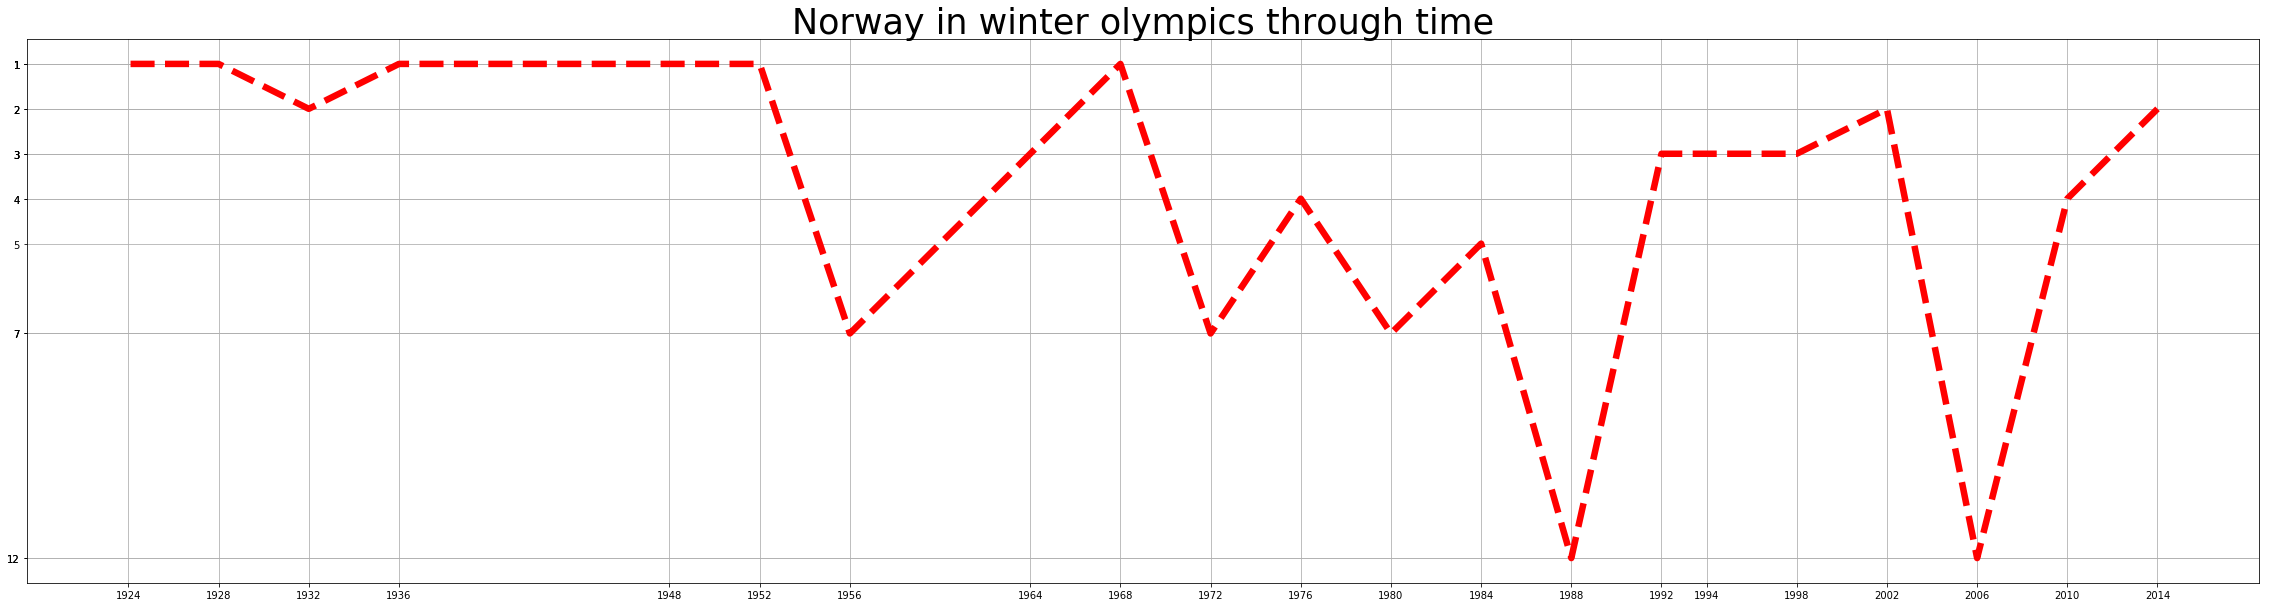

In [39]:
Hist_Norway=(
    medallero_invierno_ranking[medallero_invierno_ranking['NOC']=='NOR']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_Norway.index,Hist_Norway.values,'--',color='red',linewidth=6.5)
plt.xticks(Hist_Norway.index)
plt.yticks(Hist_Norway.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Norway in winter olympics through time',fontsize= 35)
plt.show()

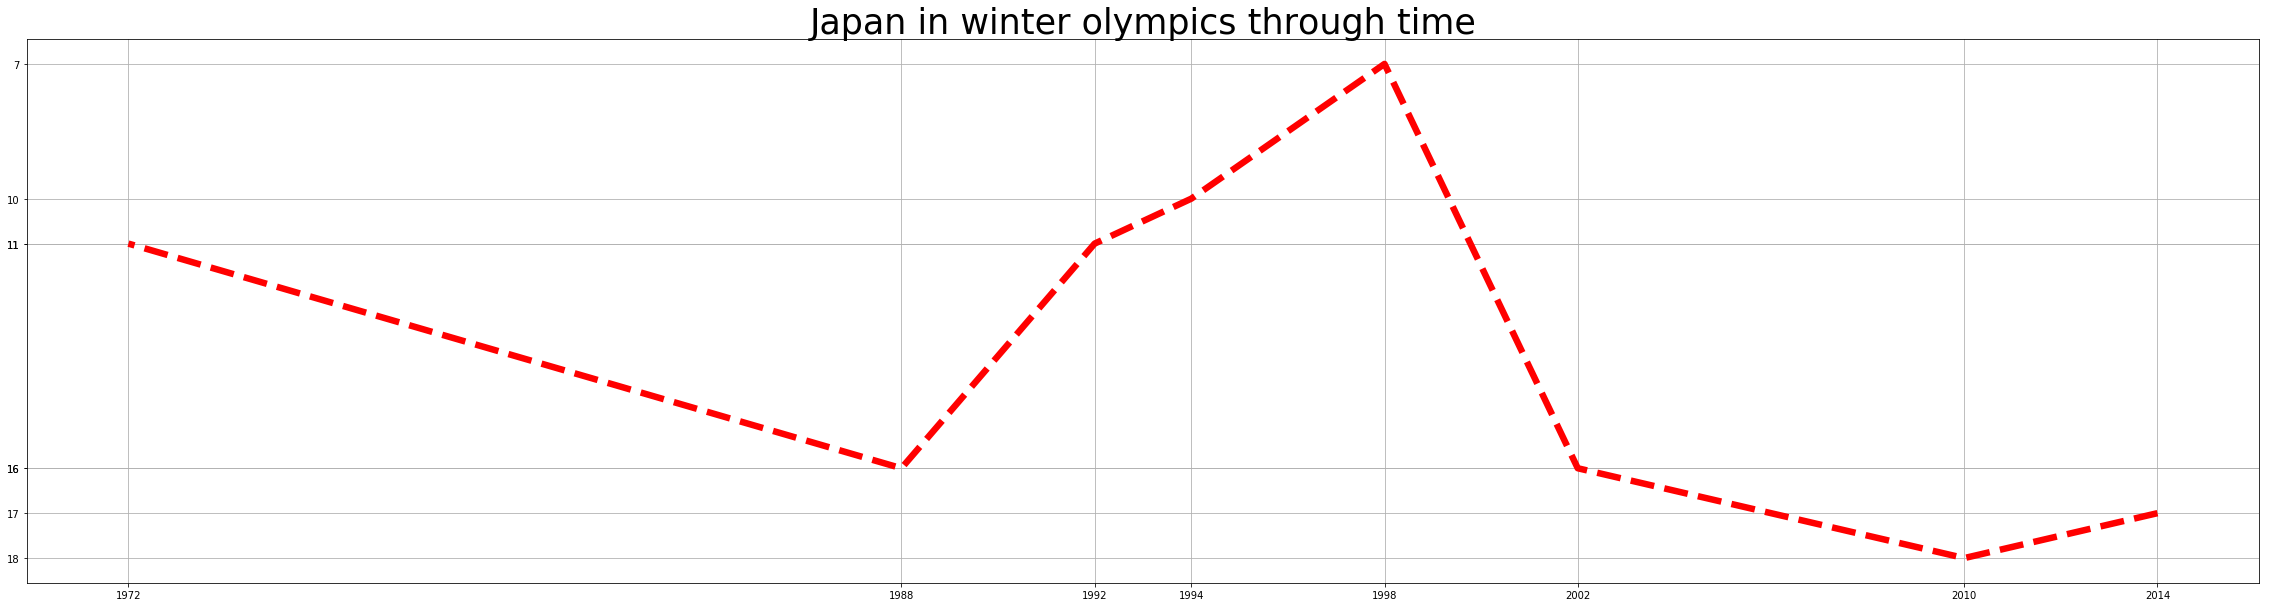

In [40]:
Hist_Japan=(
    medallero_invierno_ranking[medallero_invierno_ranking['NOC']=='JPN']
    .set_index('Year')
    .Ranking
)

plt.figure(figsize=(40,10))

plt.plot(Hist_Japan.index,Hist_Japan.values,'--',color='red',linewidth=6.5)
plt.xticks(Hist_Japan.index)
plt.yticks(Hist_Japan.values)
plt.grid(True)
plt.gca().invert_yaxis()
plt.title('Japan in winter olympics through time',fontsize= 35)
plt.show()

## Host's Metric

In [41]:
#Function to calcute host´s metric to all countries expect USSR/RUS and Germany
def metricaESP(country,years):
    aux = country
    for year in years:
        aux = aux.drop(year)
    prom = aux.mean()
    rank_host=np.array([])
    for year in years:
        valor=country[year]
        rank_host=np.append(rank_host,valor)
    host_prom=rank_host.mean()
    return prom-host_prom

In [42]:
#Function to calcute host´s metric of USSR/RUS and Germany
def metricaHosts(country,years):
    aux = ranking_hosts.loc[country,:]
    for year in years:
        aux = aux.drop(year)
    prom = aux.mean()
    rank_host=np.array([])
    for year in years:
        valor=ranking_hosts.loc[country,year]
        rank_host=np.append(rank_host,valor)
    host_prom=rank_host.mean()
    return country,prom-host_prom

In [43]:
#List with all metrics
metrica=[]
metrica.append(metricaHosts('FRA',[1924,1968,1992]))
metrica.append(metricaHosts('SUI',[1928,1948]))
metrica.append(metricaHosts('USA',[1932,1960,1980,2002]))
metrica.append(metricaHosts('NOR',[1952,1994]))
metrica.append(metricaHosts('ITA',[1956,2006]))
metrica.append(metricaHosts('AUT',[1964,1976]))
metrica.append(metricaHosts('JPN',[1972,1998]))
metrica.append(metricaHosts('YUG',[1984]))
metrica.append(metricaHosts('CAN',[1988,2010]))

In [44]:
#Calculate of the average and std of metric in winter olympics
res= np.array([])
for pais,met in metrica:
    res = np.append(res,met)
    
res = np.append(res,metricaESP(USSR_RUS,[2014]))
res = np.append(res,metricaESP(GER_GDR,[1936]))
print(res)
print(res.std())
print(res.mean())

[ 2.87719298  0.2         2.          1.9         1.4         1.3
 -4.6         0.66666667 -1.45        0.71428571  1.0952381 ]
1.9448873207129698
0.5548530416951472
